<a href="https://colab.research.google.com/github/Debanjana-github/EDA-with-python/blob/main/Automobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link="https://www.kaggle.com/datasets/toramky/automobile-dataset"

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df=pd.read_csv("/content/Automobile_data.csv")
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

Basic requirements which have to check

In [ ]:
#check how many rows and columns in the dataset
df.shape

(205, 26)

In the dataset has 205 rows and 26 columns

In [ ]:
# show the column names
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
#show  the data types of every columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
# replace the '?' by nan values because '?' create  problem to analysis
df.replace('?',np.nan,inplace=True)

In [ ]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [ ]:
# change the datatypes of some variables which have wrong data types
convert_dict = {'make': str,
                'price': float,
                'bore':float,
                'stroke':float,
                'horsepower':float,
                'peak-rpm':float,
                'normalized-losses':float,
                'symboling':object

                }

df = df.astype(convert_dict)
print(df.dtypes)

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [ ]:
# check the null values. which variables has null values and how many null values are there
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Handle Missing values

In [ ]:
#showing missing value columns
[features for features in df.columns if df[features].isnull().sum()>0]

['normalized-losses',
 'num-of-doors',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'price']

<Axes: >

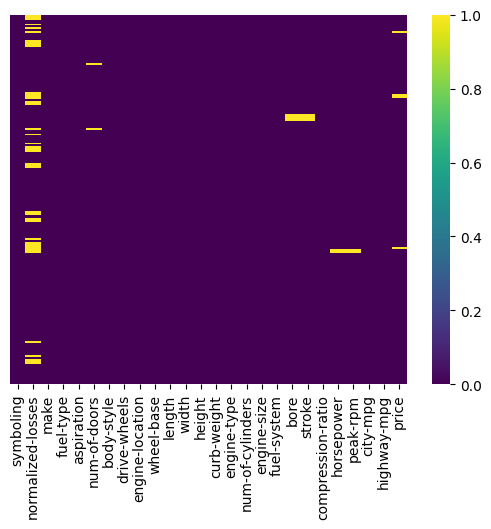

In [ ]:
## showing  missing value in the heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

From the above missing value heatmap shows the missingness occurs complete randomly, and there is no relationship between the missing values and the observed data

Fill the categorical variable by mode because it helps maintain the overall distribution and preserves the dominant category, minimizing disruption in the dataset's categorical structure.
Fill with Mean imputation when the missing values are numerical and the distribution of the variable is approximately normal. And Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

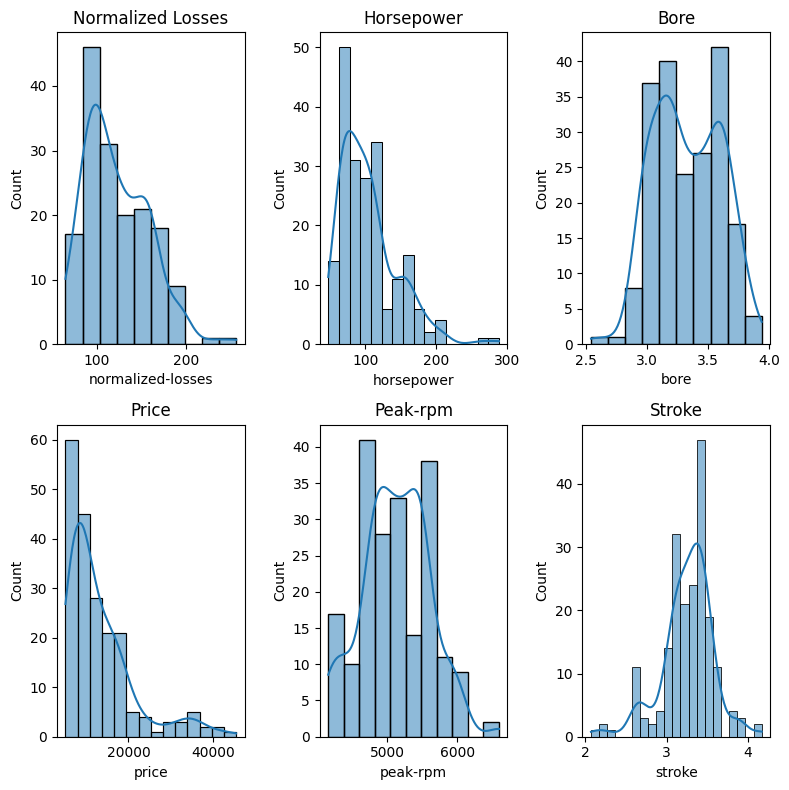

In [ ]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,8))

sns.histplot(data=df, x="normalized-losses", kde=True, ax=axes[0, 0])
sns.histplot(data=df, x="horsepower", kde=True, ax=axes[0, 1])
sns.histplot(data=df, x="bore", kde=True, ax=axes[0,2])
sns.histplot(data=df, x="price", kde=True, ax=axes[1, 0])
sns.histplot(data=df, x="peak-rpm", kde=True, ax=axes[1, 1])
sns.histplot(data=df, x="stroke", kde=True, ax=axes[1, 2])

# Add titles and adjust layout
axes[0, 0].set_title("Normalized Losses")
axes[0, 1].set_title("Horsepower")
axes[0,2].set_title("Bore")
axes[1, 0].set_title("Price")
axes[1, 1].set_title("Peak-rpm")
axes[1, 2].set_title("Stroke")

plt.tight_layout()
plt.show()


In [ ]:
# The distribution of normalized-losses, horsepower,bore and price are skewed so fill the values by median
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median())
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())
df['bore']=df['bore'].fillna(df['bore'].median())
df['price']=df['price'].fillna(df['price'].median())
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median())
df['stroke']=df['stroke'].fillna(df['stroke'].median())

In [ ]:
# for categorical or discrete variables are fill by mode
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
most_frequent = df['num-of-doors'].value_counts().index[0]
most_frequent

'four'

In [ ]:
df['num-of-doors'] = df['num-of-doors'].fillna(df['num-of-doors'].mode()[0])

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# statistical measures of every numerical values
df.describe()

normalized-losses  wheel-base      length       width      height  \
count         205.000000  205.000000  205.000000  205.000000  205.000000   
mean          120.600000   98.756585  174.049268   65.907805   53.724878   
std            31.805105    6.021776   12.337289    2.145204    2.443522   
min            65.000000   86.600000  141.100000   60.300000   47.800000   
25%           101.000000   94.500000  166.300000   64.100000   52.000000   
50%           115.000000   97.000000  173.200000   65.500000   54.100000   
75%           137.000000  102.400000  183.100000   66.900000   55.500000   
max           256.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size        bore      stroke  compression-ratio  \
count   205.000000   205.000000  205.000000  205.000000         205.000000   
mean   2555.565854   126.907317    3.329366    3.256098          10.142537   
std     520.680204    41.642693    0.270858    0.313634           3.972040   
min    1488.000000    61.000000    2.540000    2.070000           7.000000   
25%    2145.000000    97.000000    3.150000    3.110000           8.600000   
50%    2414.000000   120.000000    3.310000    3.290000           9.000000   
75%    2935.000000   141.000000    3.580000    3.410000           9.400000   
max    4066.000000   326.000000    3.940000    4.170000          23.000000   

       horsepower     peak-rpm    city-mpg  highway-mpg         price  
count  205.000000   205.000000  205.000000   205.000000    205.000000  
mean   104.165854  5126.097561   25.219512    30.751220  13150.307317  
std     39.529733   477.035772    6.542142     6.886443   7879.121326  
min     48.000000  4150.000000   13.000000    16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000    25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000    30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000    34.000000  16500.000000  
max    288.000000  6600.000000   49.000000    54.000000  45400.000000

<ipython-input-19-7e9dc010a590>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')


<Axes: >

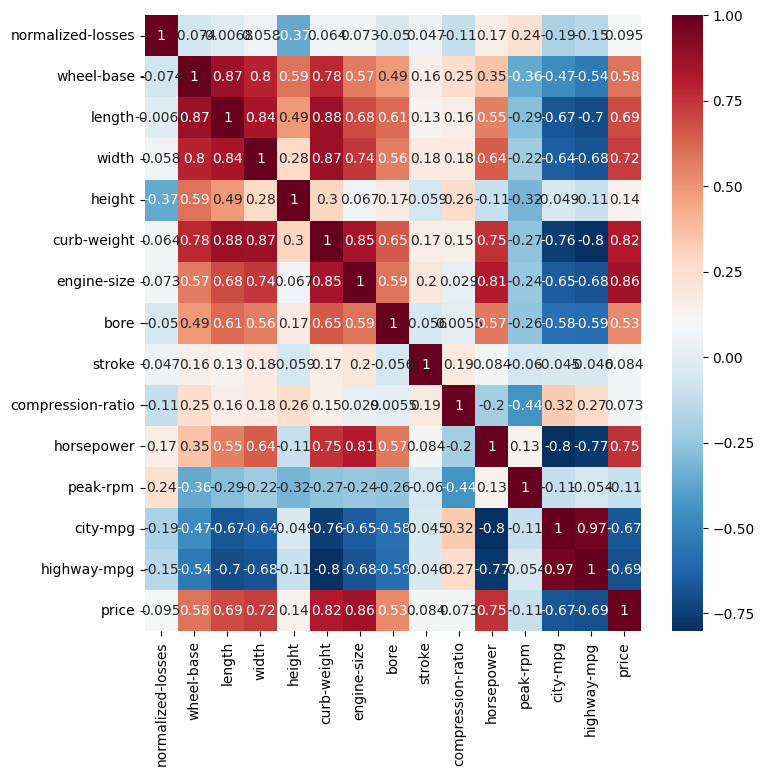

In [ ]:
# heatmap to show the correlations between the variables
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')

Explanatory Data Analysis

<ipython-input-21-86c1ddc3c66a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

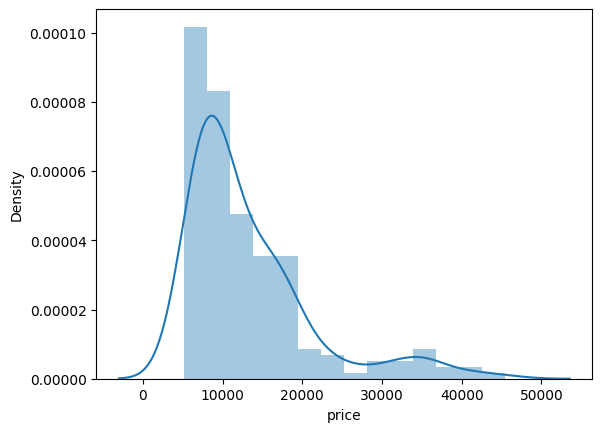

In [ ]:
sns.distplot(df['price'])

<ipython-input-84-753ce9645879>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

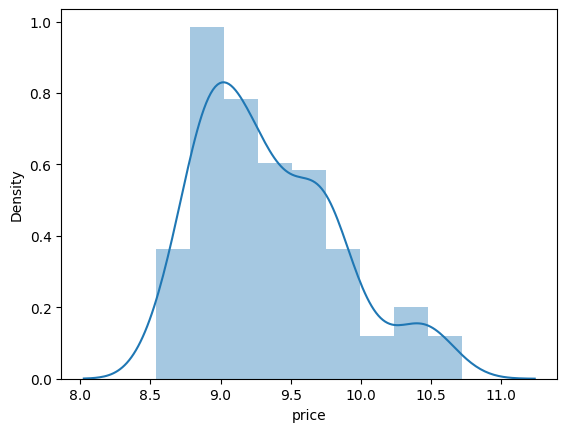

In [ ]:
sns.distplot(np.log(df['price']))

In [ ]:
# Empty list to store the column names with object datatype
object_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        object_columns.append(col)

print(object_columns)

['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


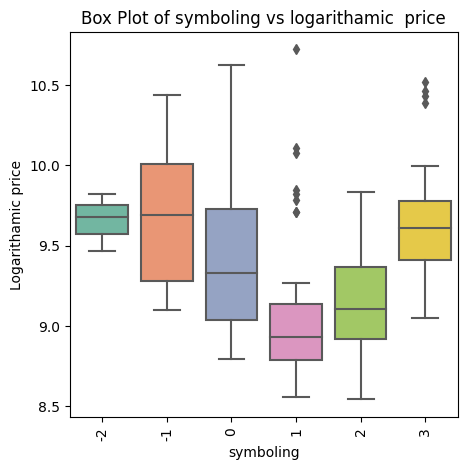

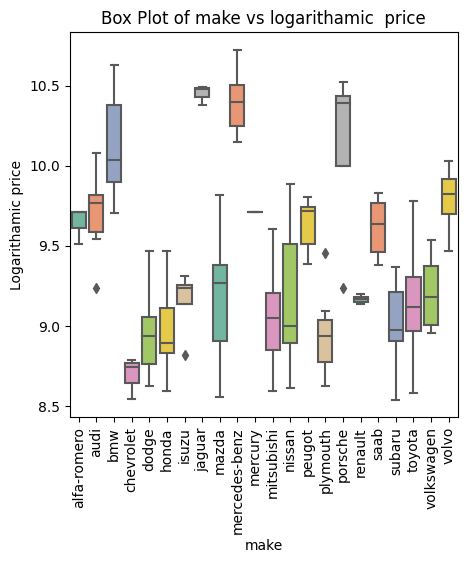

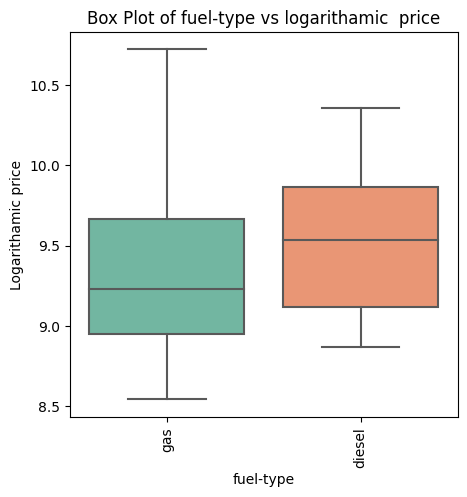

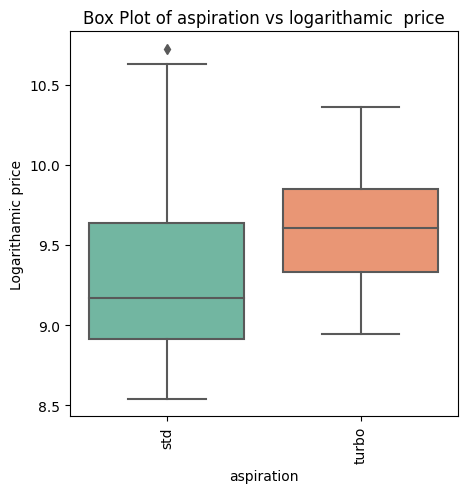

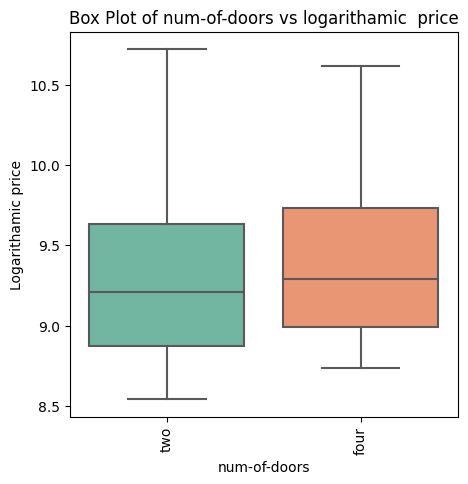

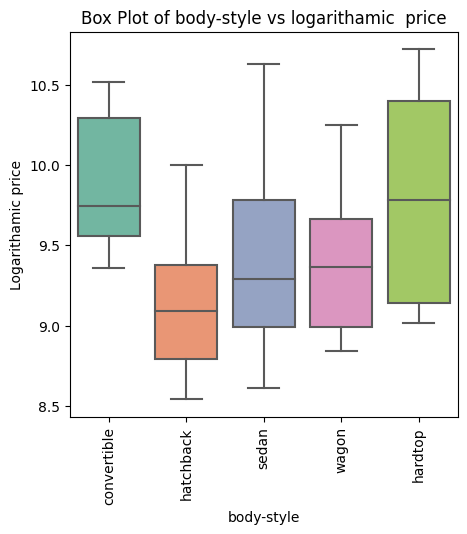

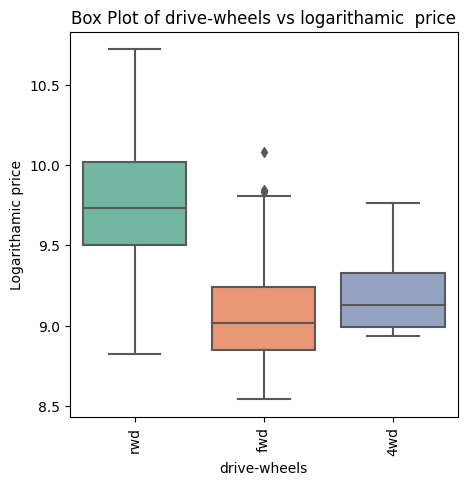

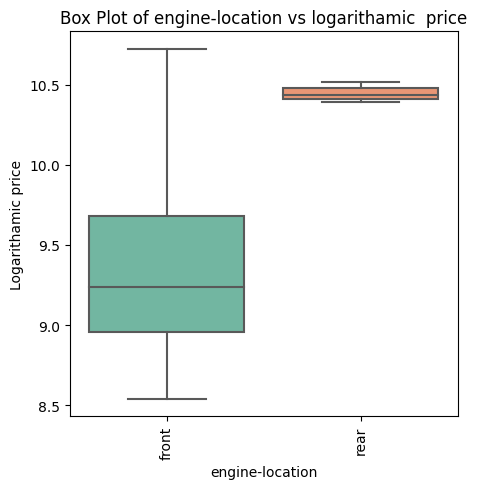

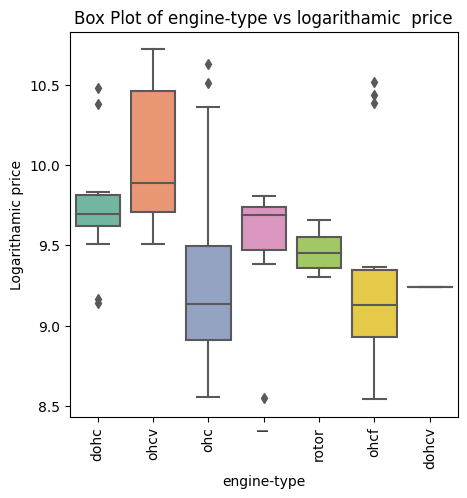

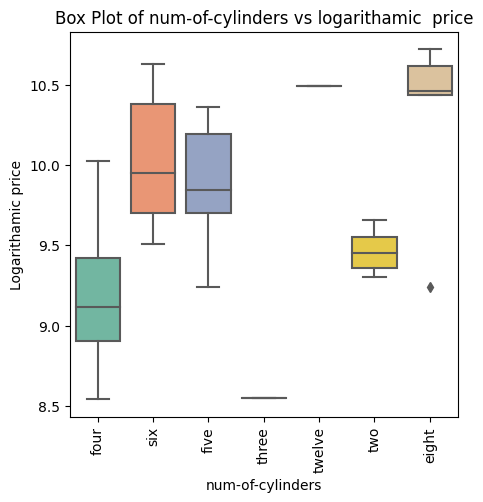

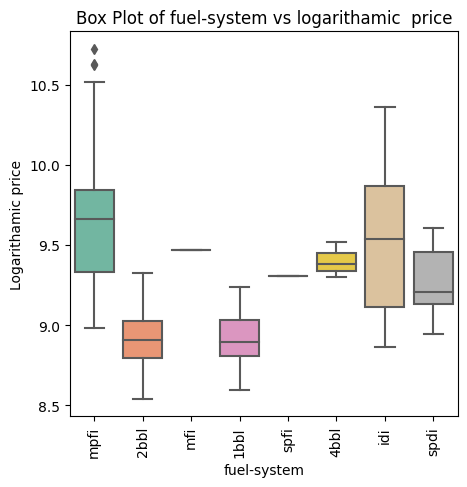

In [ ]:
categorical_columns=['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
for col in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=col, y=np.log(df['price']), data=df, palette='Set2',color=col)
    plt.title(f'Box Plot of {col} vs logarithamic  price')
    plt.ylabel('Logarithamic price')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

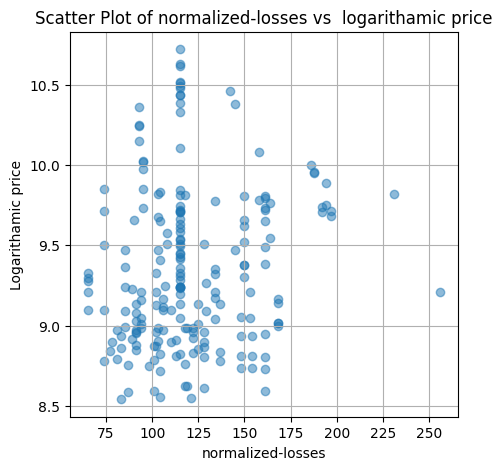

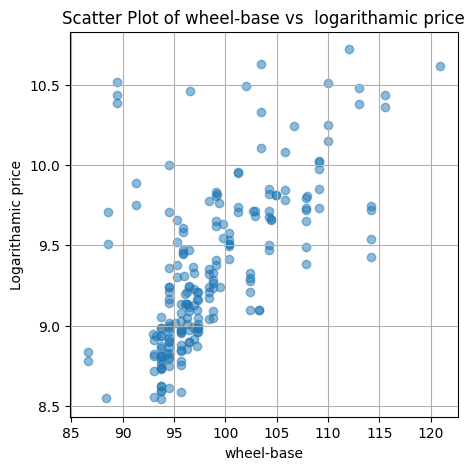

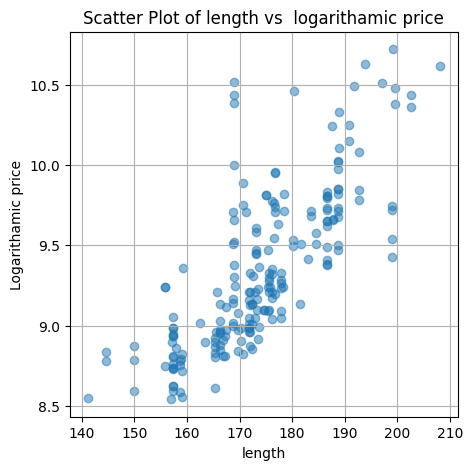

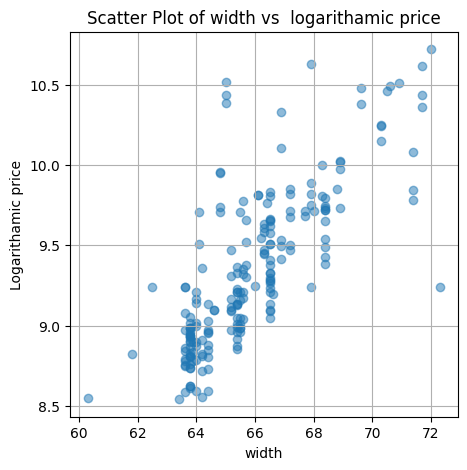

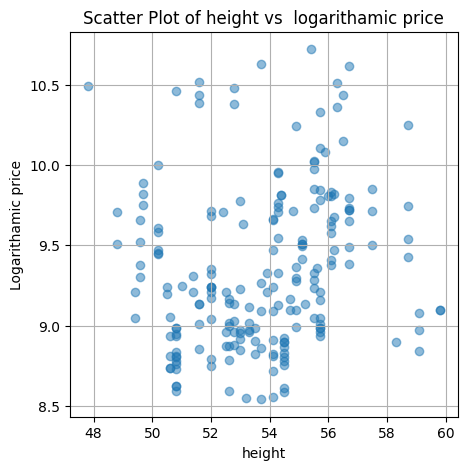

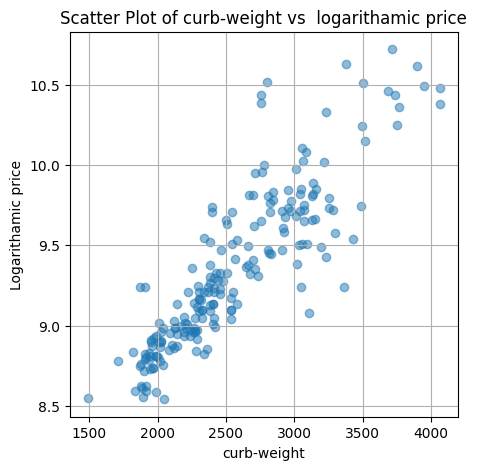

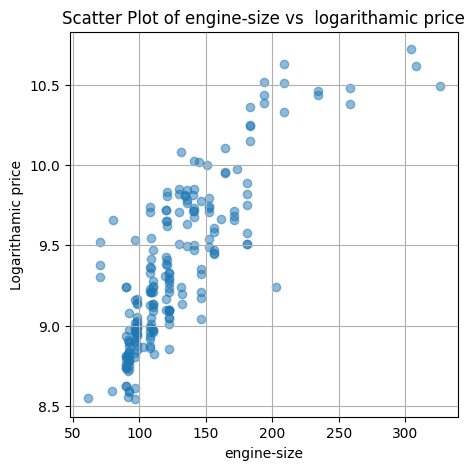

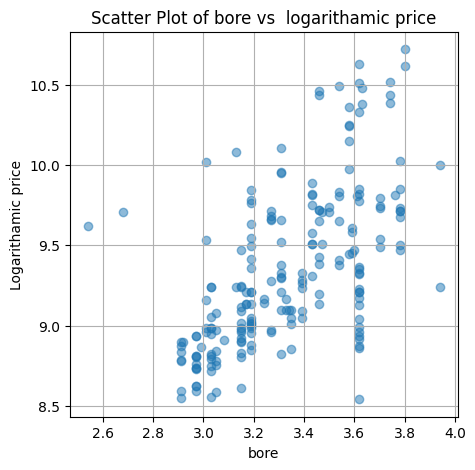

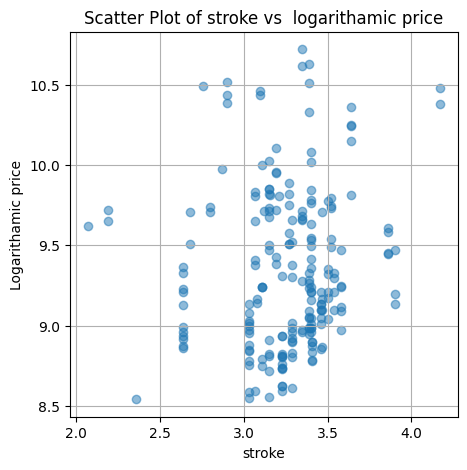

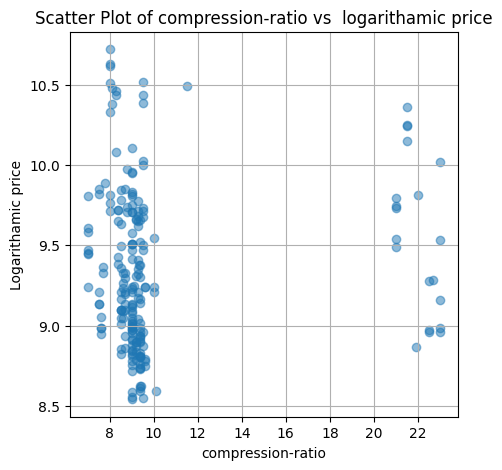

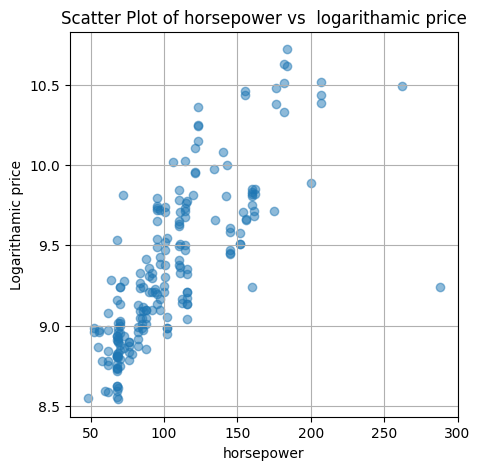

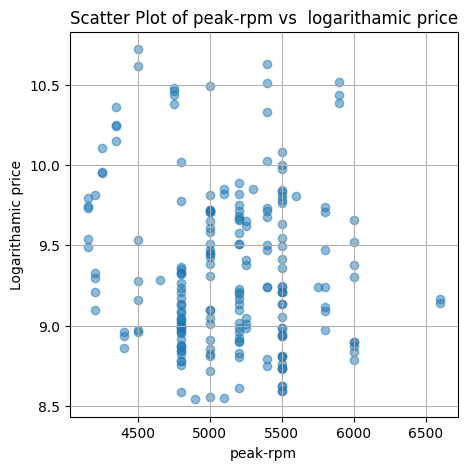

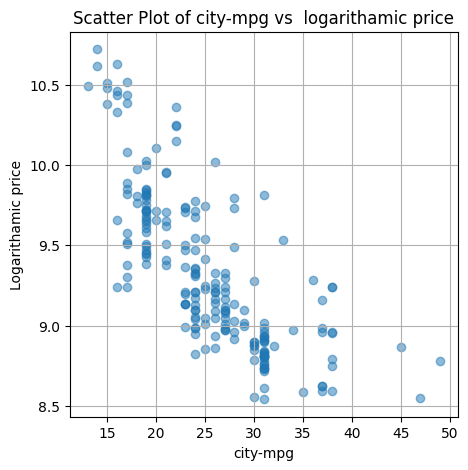

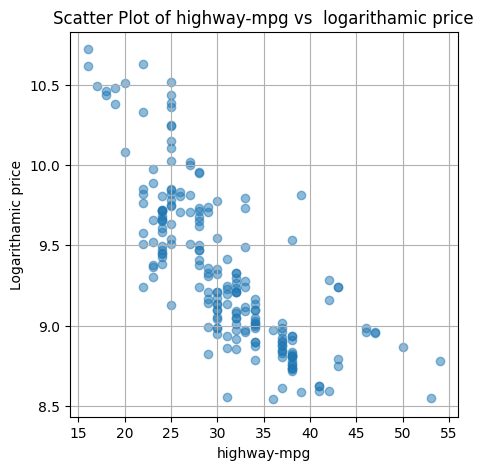

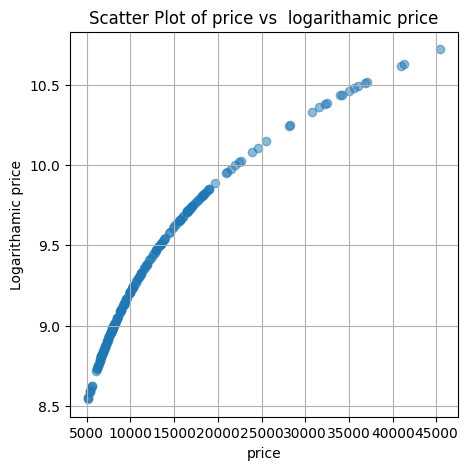

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(5,5))
    plt.scatter(x=df[column],y=np.log( df['price']), alpha=0.5)
    plt.title(f'Scatter Plot of {column} vs  logarithamic price')
    plt.xlabel(column)
    plt.ylabel('Logarithamic price')
    plt.grid(True)
    plt.show()

In [ ]:
#import label encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df[object_columns]=df[object_columns].apply(le.fit_transform)

MULTIPLE LINEAR REGRESSION

Assumption:     
1. Linearity
2. Normality of response variable
3. No Multicolinearity
4. Autocorrelation
5. No Homoskedasticity

1. Linearity

2. Normality of response variable:   
Previously already seen that the target variable 'price' is positively skewed so we use log transformation to convert it to gussian ditribuation.

3. Multicollinearity:

Multiple linear regression assumes that none of the predictor variables are highly correlated with each other.

When one or more predictor variables are highly correlated, the regression model suffers from multicollinearity

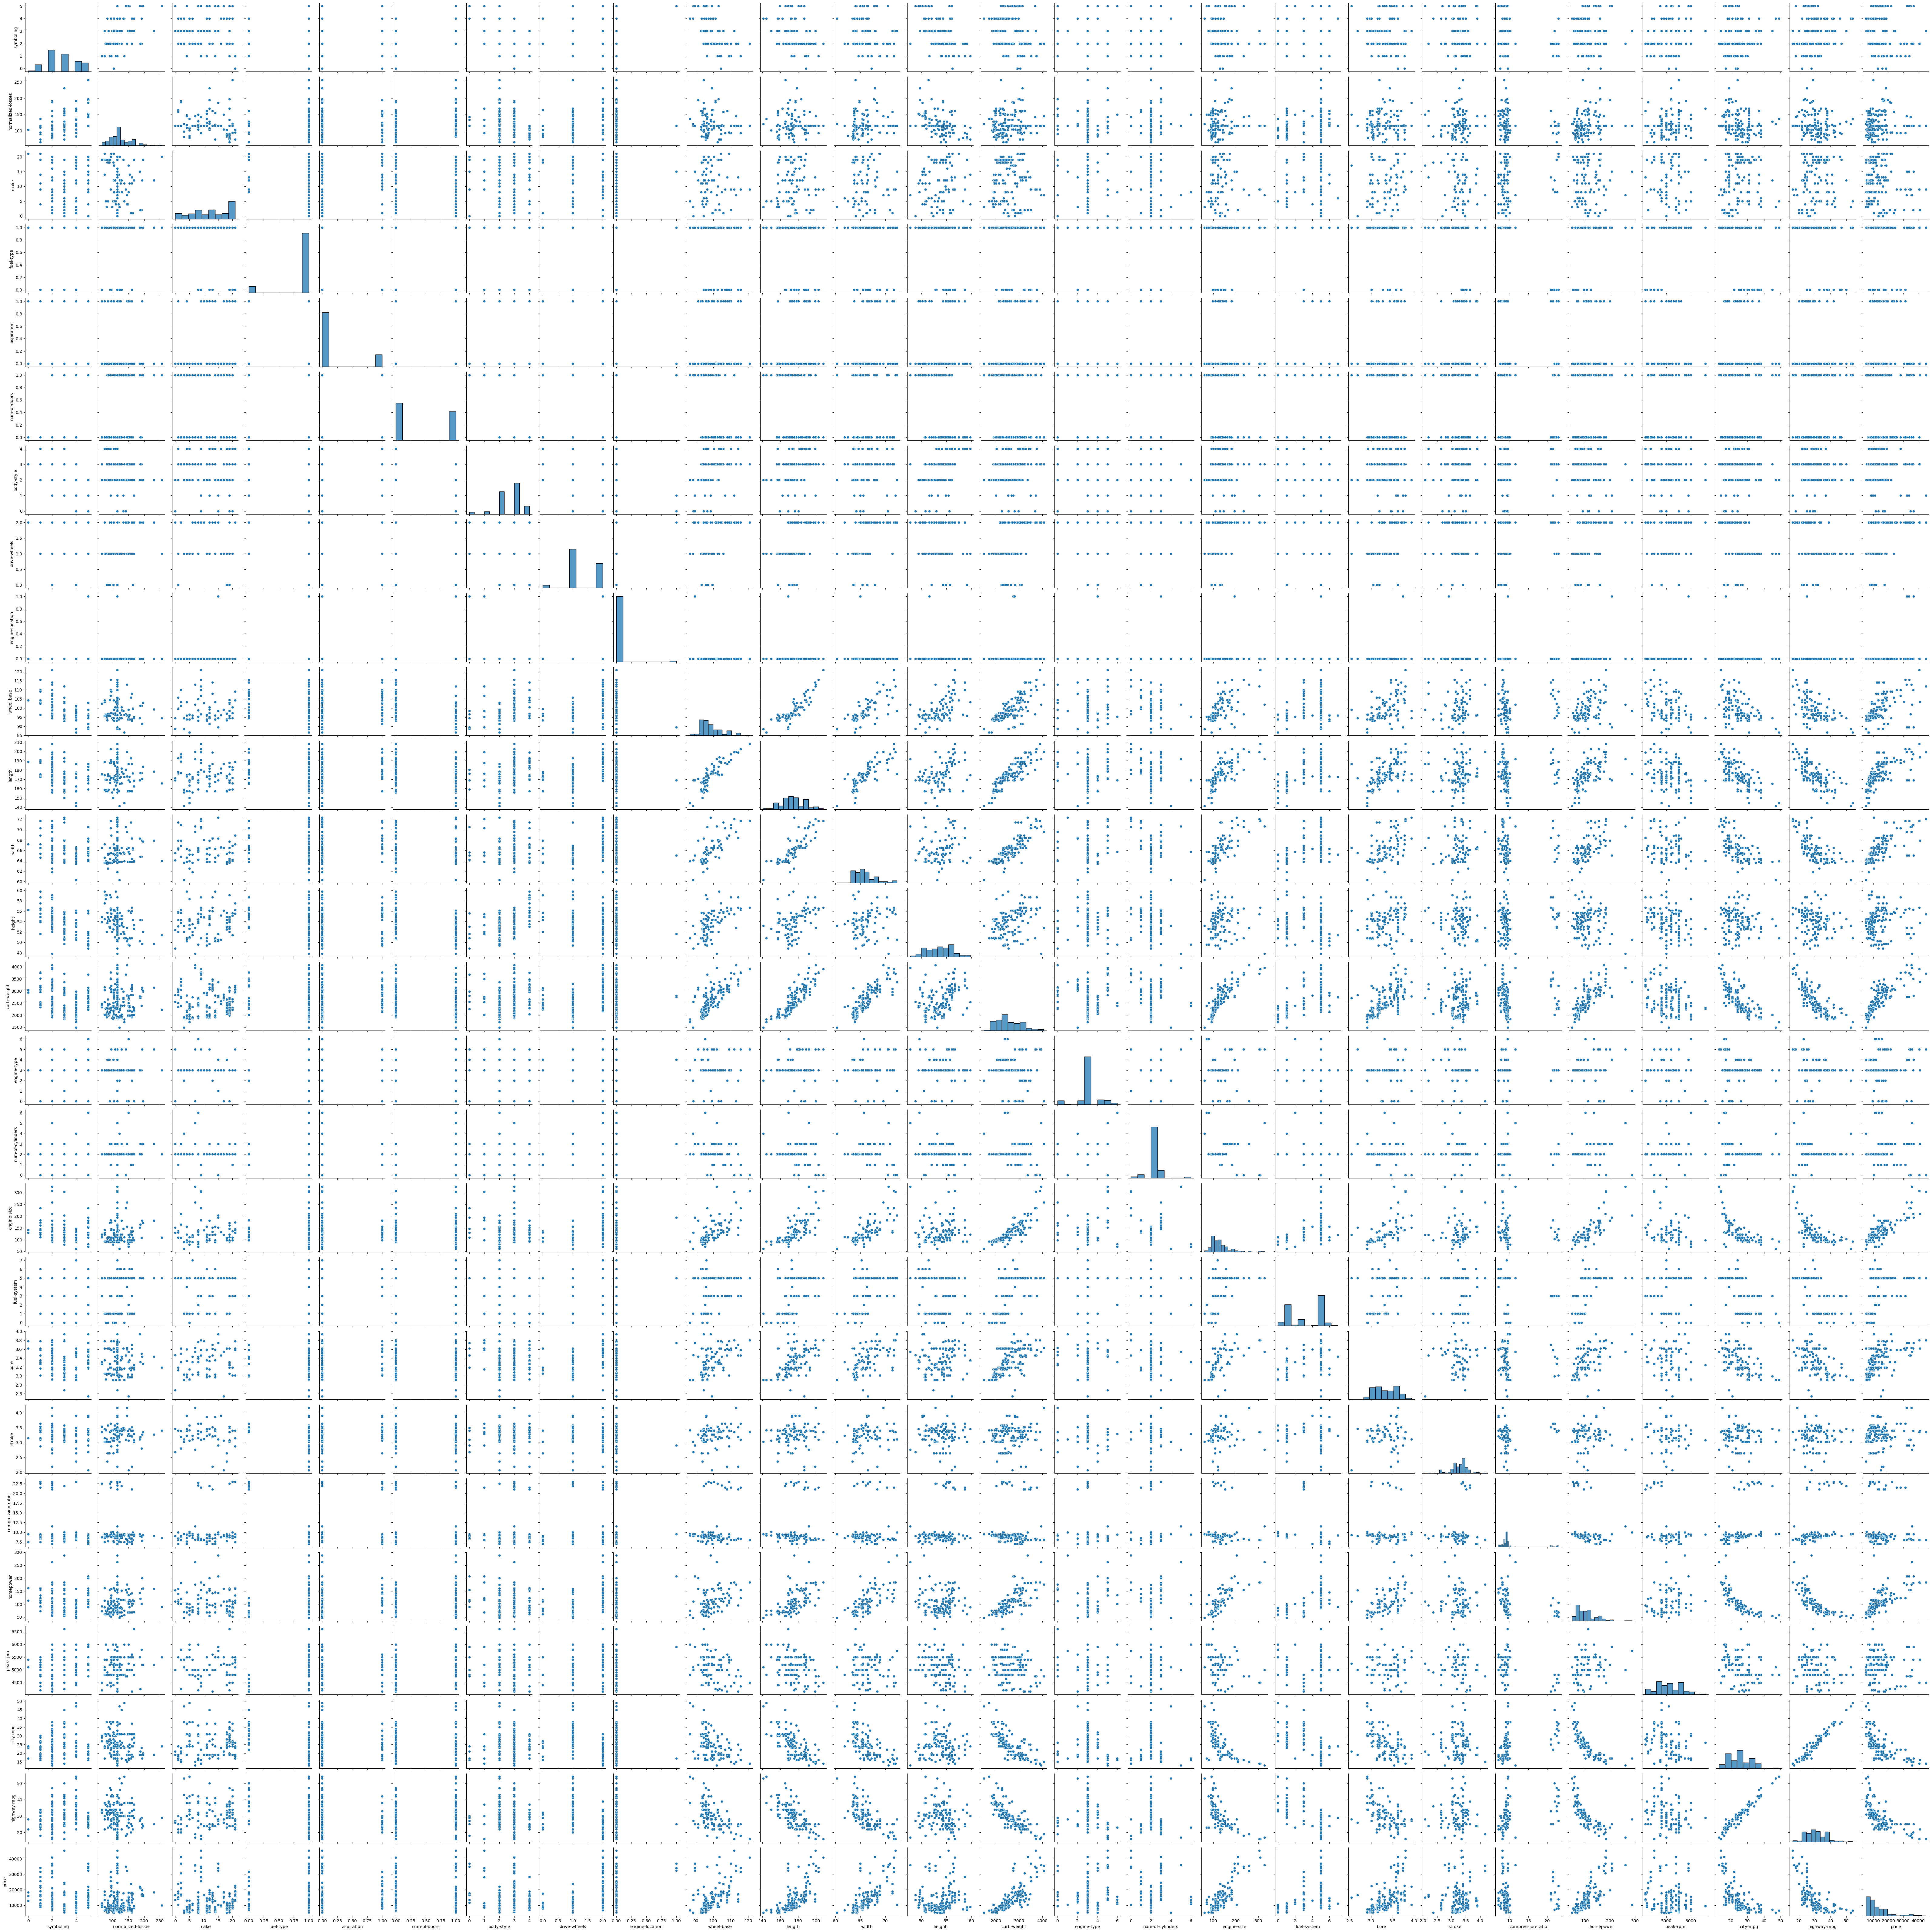

In [ ]:
p = sns.pairplot(df)

One way to detect multicollinearity is by using a metric known as the variance inflation factor (VIF), which measures the correlation and strength of correlation between the explanatory variables in a regression model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
target_variable = 'price'  # Replace with the name of your target variable column
predictor_variables = df.drop(target_variable, axis=1)

In [ ]:
predictor_variables = add_constant(predictor_variables)

In [ ]:
vif = pd.DataFrame()
vif["Variable"] = predictor_variables.columns
vif["VIF"] = [variance_inflation_factor(predictor_variables.values, i) for i in range(predictor_variables.shape[1])]


In [ ]:
print(vif)

             Variable          VIF
0               const  8768.576738
1           symboling     3.206196
2   normalized-losses     1.802699
3                make     1.545370
4           fuel-type   107.466100
5          aspiration     3.346647
6        num-of-doors     2.842902
7          body-style     2.900125
8        drive-wheels     2.751290
9     engine-location     1.773059
10         wheel-base    10.973549
11             length    11.768233
12              width     9.029625
13             height     3.230994
14        curb-weight    19.072944
15        engine-type     1.624277
16   num-of-cylinders     2.265734
17        engine-size    14.044246
18        fuel-system     2.603927
19               bore     2.558214
20             stroke     1.610800
21  compression-ratio    98.742992
22         horsepower    15.808210
23           peak-rpm     2.817838
24           city-mpg    33.542317
25        highway-mpg    28.700250


In [ ]:
columns_to_drop = ['fuel-type','wheel-base','length','curb-weight','engine-size','compression-ratio','horsepower','city-mpg','highway-mpg','width']

df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'height',
       'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke',
       'peak-rpm', 'price'],
      dtype='object')

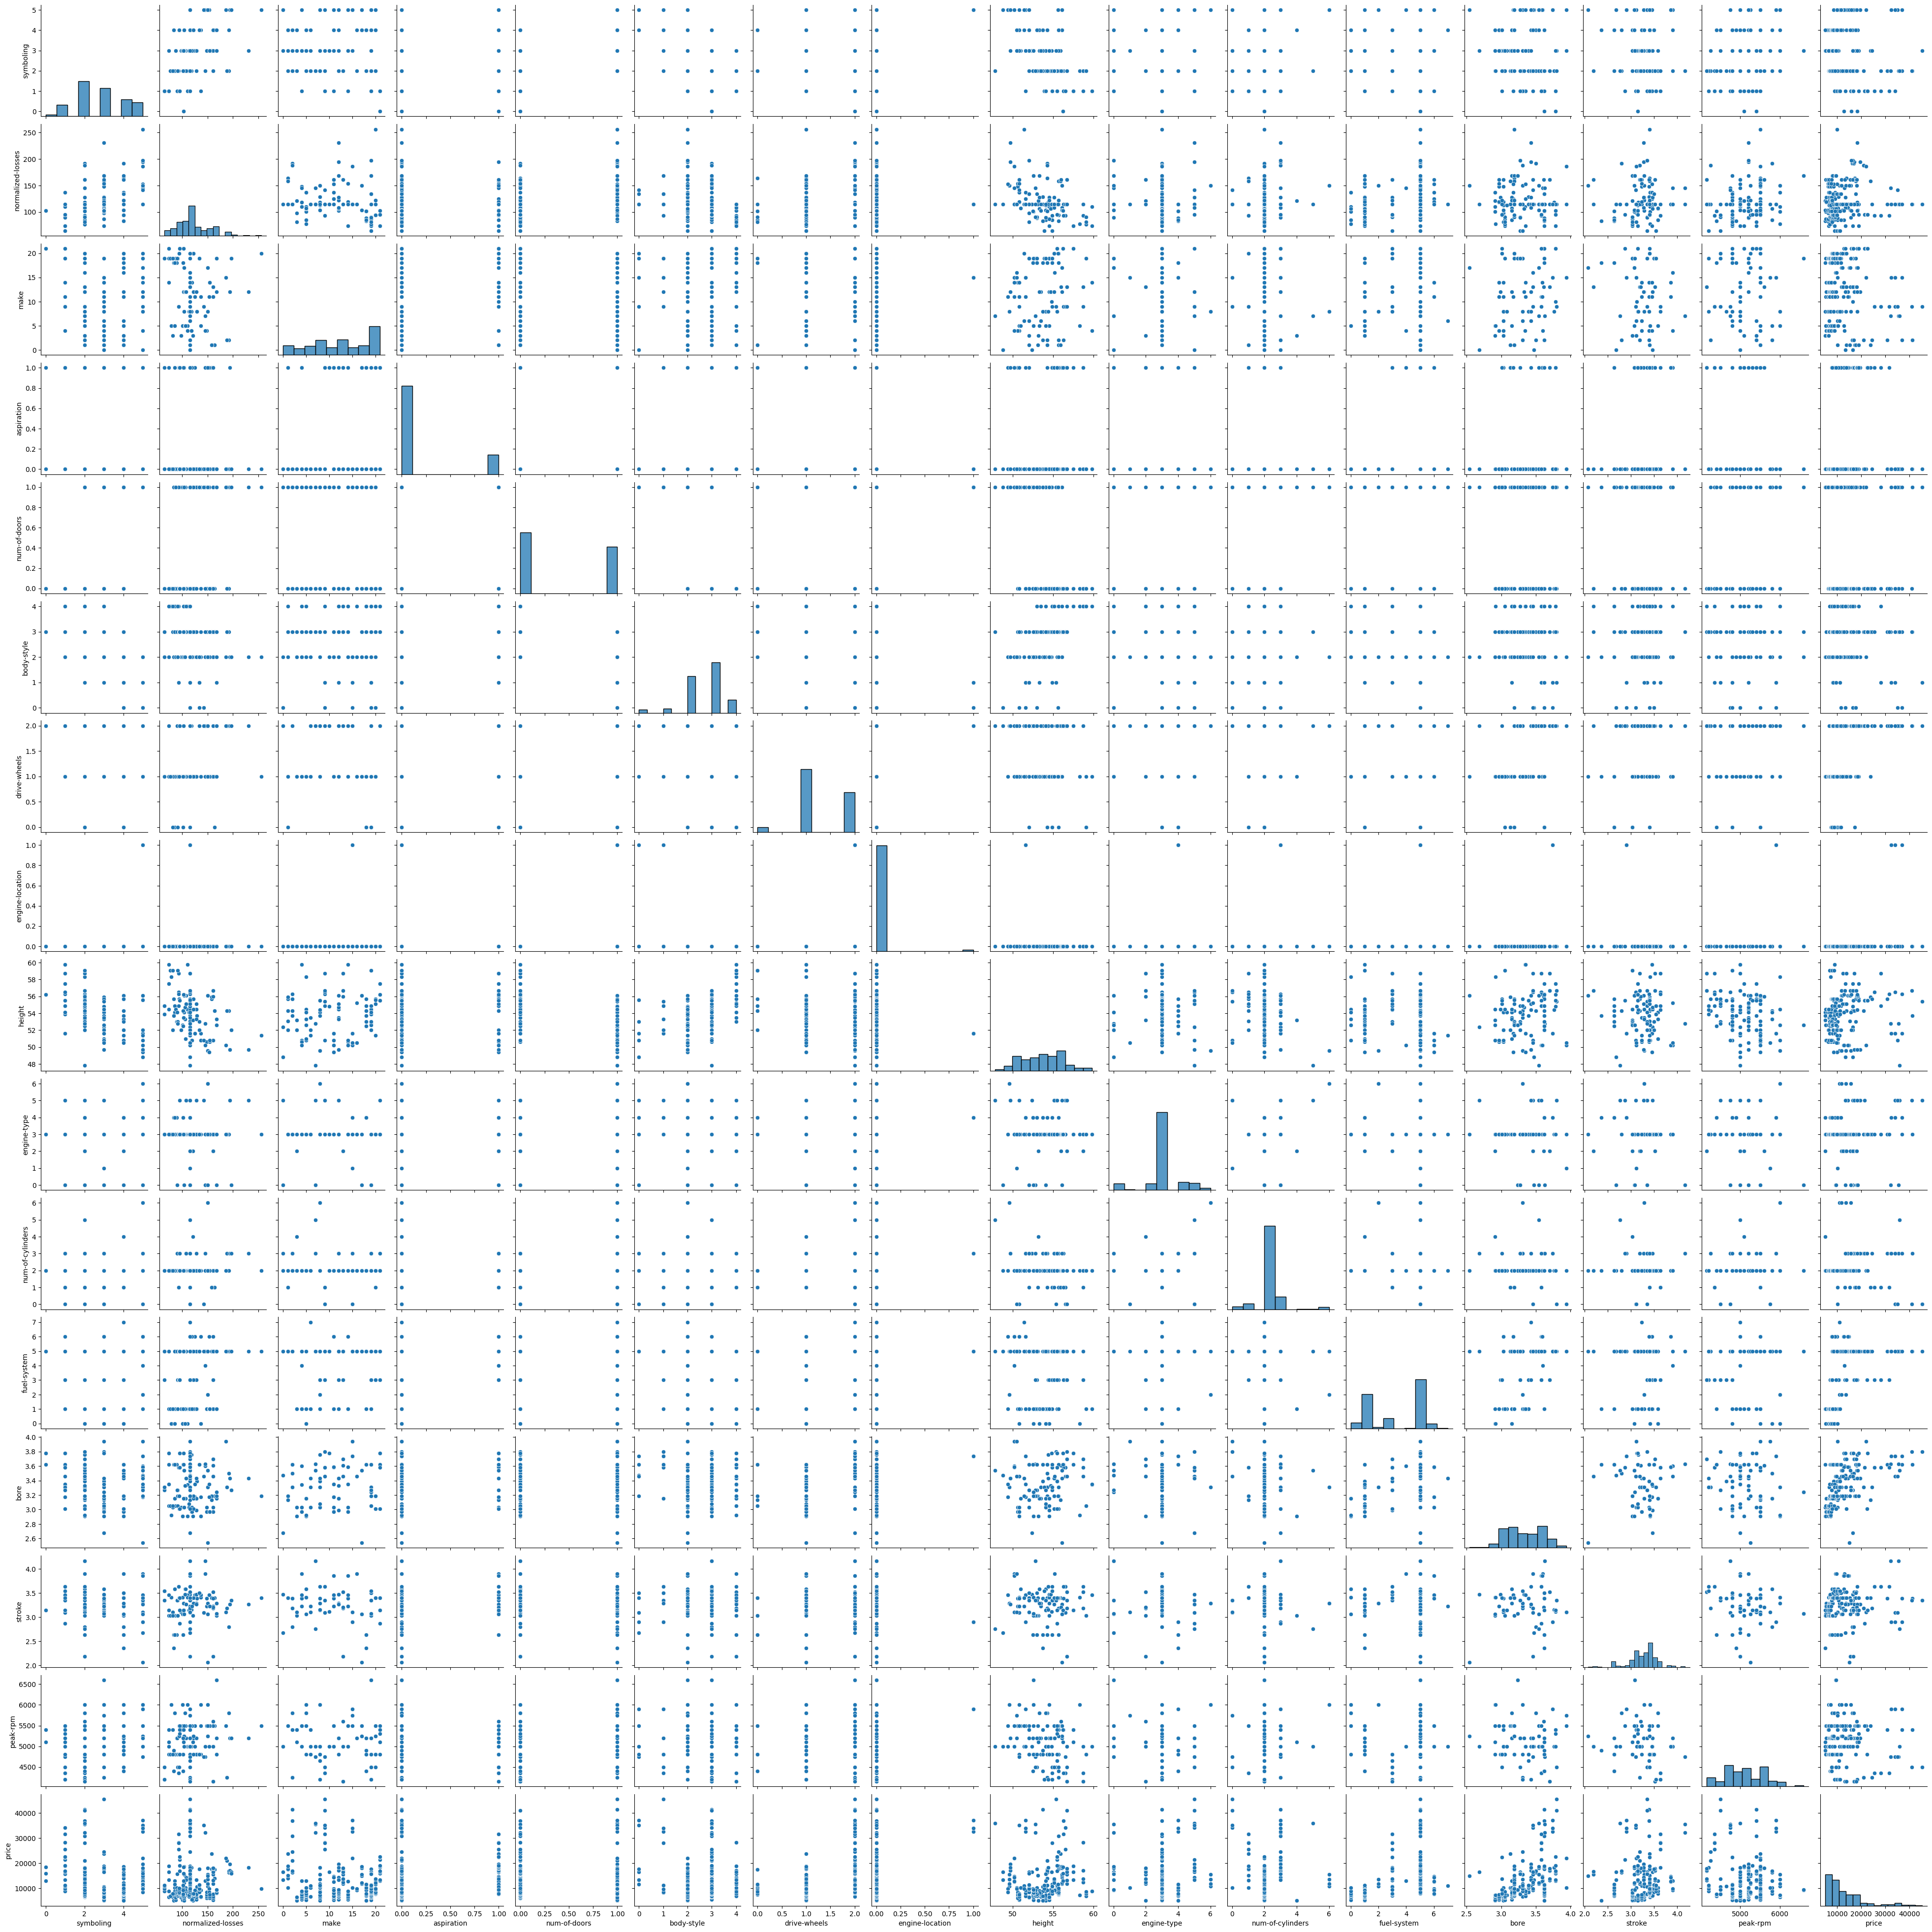

In [ ]:
p = sns.pairplot(df)

4. Autocorrelation

In [ ]:
# Perform the Durbin-Watson test
import statsmodels.api as sm
dw_test = sm.stats.stattools.durbin_watson(np.log(df['price']))

# Print the Durbin-Watson test statistic
print("Durbin-Watson test statistic:", dw_test)

Durbin-Watson test statistic: 0.0014145436530020178


MODEL

In the initial stage of model we already assume that there is no heteroscedasticity in the dataset.

In [ ]:
X=df.drop(['price'],axis=1)
y=np.log(df['price'])

In [ ]:
X

symboling  normalized-losses  make  aspiration  num-of-doors  body-style  \
0            5              115.0     0           0             1           0   
1            5              115.0     0           0             1           0   
2            3              115.0     0           0             1           2   
3            4              164.0     1           0             0           3   
4            4              164.0     1           0             0           3   
..         ...                ...   ...         ...           ...         ...   
200          1               95.0    21           0             0           3   
201          1               95.0    21           1             0           3   
202          1               95.0    21           0             0           3   
203          1               95.0    21           1             0           3   
204          1               95.0    21           1             0           3   

     drive-wheels  engine-location  height  engine-type  num-of-cylinders  \
0               2                0    48.8            0                 2   
1               2                0    48.8            0                 2   
2               2                0    52.4            5                 3   
3               1                0    54.3            3                 2   
4               0                0    54.3            3                 1   
..            ...              ...     ...          ...               ...   
200             2                0    55.5            3                 2   
201             2                0    55.5            3                 2   
202             2                0    55.5            5                 3   
203             2                0    55.5            3                 3   
204             2                0    55.5            3                 2   

     fuel-system  bore  stroke  peak-rpm  
0              5  3.47    2.68    5000.0  
1              5  3.47    2.68    5000.0  
2              5  2.68    3.47    5000.0  
3              5  3.19    3.40    5500.0  
4              5  3.19    3.40    5500.0  
..           ...   ...     ...       ...  
200            5  3.78    3.15    5400.0  
201            5  3.78    3.15    5300.0  
202            5  3.58    2.87    5500.0  
203            3  3.01    3.40    4800.0  
204            5  3.78    3.15    5400.0  

[205 rows x 15 columns]

In [ ]:
y

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
200     9.731809
201     9.854560
202     9.975110
203    10.019936
204    10.026811
Name: price, Length: 205, dtype: float64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#standadizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train= rg.predict(X_train)
y_pred_test= rg.predict(X_test)

In [ ]:
print(f"The train predicted values:",y_pred_train)
print(f"The test predicted values:",y_pred_test)

The train predicted values: [ 9.44980198  9.96301691  9.23832695  8.68405308  9.95072986  8.90243796
  9.66985079  8.81444874  8.82004184  9.40972155  8.8315028   8.94434208
  9.70144326  9.25173312  9.4868212   9.70554223  8.75213682  9.30035031
  8.94511686  9.43216217  9.74357967  9.95308012  9.69415161  8.75213682
  9.87499185  8.7660612  10.41239776  8.99929728  8.93799696  8.92854987
  9.83193388  9.11392411  8.85486642  9.48527027  9.17236676  8.73242609
 10.02969161  9.75160677  8.95458453  9.68548569  9.47901752 10.41239776
  9.80363636  9.02877095  9.39043443  8.75521394  9.80525542  9.12705162
  9.87393522  8.7889654   9.83597824  9.25042326  8.6612879   8.74151106
  9.64119195  9.71447018  9.02182892  9.15774601  9.83768405  9.41679449
  9.34139874  8.79587846  9.16075764  9.39743978  8.96101249  9.90061368
  9.16026399  9.38876708  8.69926413  9.38101879  8.8430937   8.96101249
  9.77276794  9.87620021  8.85876887  9.08615106  9.39881342  9.05315147
  9.66061234  9.7630362

In [ ]:
from sklearn.metrics import r2_score
print("Training R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))
print("Testing R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

Training R squared: 0.7241505027710187
Testing R squared: 0.7492677016115161


In [ ]:
# Mean of residual
residuals = y_train-y_pred_train
mean_residuals = np.mean(residuals)

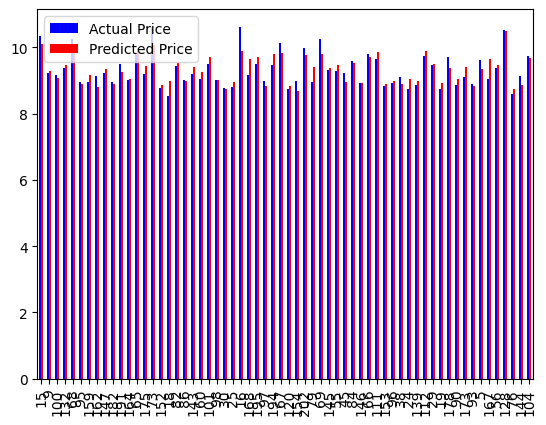

In [ ]:
#Plotting the compared data
compare1 = pd.DataFrame({'Actual Price':y_test,"Predicted Price" : y_pred_test})
compare1.plot(kind="bar", color =['Blue','Red'])
plt.show()

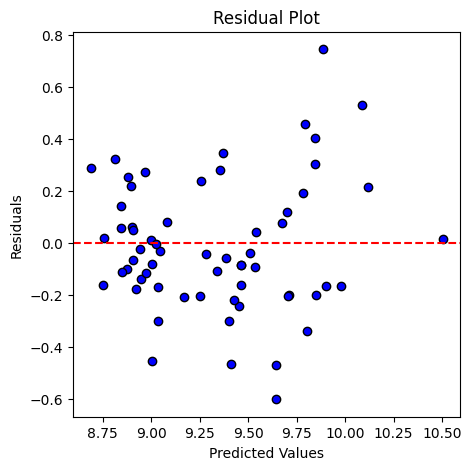

In [ ]:
#residual plot
residuals1 = y_test - y_pred_test
plt.figure(figsize=(5,5))
plt.scatter(y_pred_test, residuals1, c='blue', marker='o', edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Text(0, 0.5, 'Predicted values')

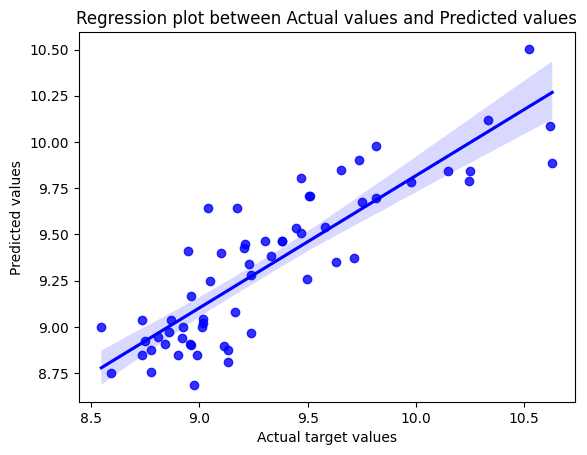

In [ ]:
sns.regplot(x=y_test,y=y_pred_test,color ='blue');
plt.title("Regression plot between Actual values and Predicted values")
plt.xlabel("Actual target values")
plt.ylabel("Predicted values")

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'height',
       'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke',
       'peak-rpm', 'price'],
      dtype='object')

In [ ]:
coeff_intercept = {'Features':['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'height',
       'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke',
       'peak-rpm'],
          'Coefficients': rg.coef_,'Intercept':rg.intercept_}
coeff_intercept_df = pd.DataFrame(coeff_intercept).sort_values(by=['Coefficients'],ascending=False)
coeff_intercept_df

Features  Coefficients  Intercept
7     engine-location      0.703162    5.70905
12               bore      0.378310    5.70905
6        drive-wheels      0.224502    5.70905
11        fuel-system      0.105162    5.70905
3          aspiration      0.086937    5.70905
10   num-of-cylinders      0.045676    5.70905
9         engine-type      0.041603    5.70905
8              height      0.040601    5.70905
13             stroke      0.022611    5.70905
1   normalized-losses      0.001281    5.70905
14           peak-rpm     -0.000061    5.70905
2                make     -0.019486    5.70905
0           symboling     -0.021392    5.70905
5          body-style     -0.090975    5.70905
4        num-of-doors     -0.150929    5.70905

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Calculate the RSS
rss = np.sum(residuals**2)

print("RSS:", rss)

RSS: 3.9422876034485173


In [ ]:
#Lets check the accuracy of the model
from sklearn import metrics
mea = metrics.mean_absolute_error(y_test,y_pred_test)
mse = metrics.mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
R2 = np.round(metrics.r2_score(y_test,y_pred_test)*100,6)

In [ ]:
print(" Multiple regression  report:")
print("Mean Absolute Error:",mea)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:", R2,"%")

 Multiple regression  report:
Mean Absolute Error: 0.198222450013167
Mean Squared Error: 0.06358528392658899
Root Mean Squared Error: 0.2521612260570387
R-squared: 74.92677 %


4. No heteroskedasticity

In [ ]:
import statsmodels.api as sm

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

stud_res = results.outlier_test()

#display studentized residuals
print(stud_res)

     student_resid   unadj_p  bonf(p)
177       0.239917  0.810781      1.0
75       -1.344992  0.181025      1.0
174       0.642997  0.521385      1.0
31        0.412791  0.680456      1.0
12        0.292277  0.770552      1.0
..             ...       ...      ...
106       0.205852  0.837236      1.0
14        0.527219  0.598961      1.0
92       -0.621194  0.535585      1.0
179       1.068356  0.287386      1.0
102      -0.647723  0.518333      1.0

[143 rows x 3 columns]


In [ ]:
# len(y_pred_train)
len(stud_res)

143

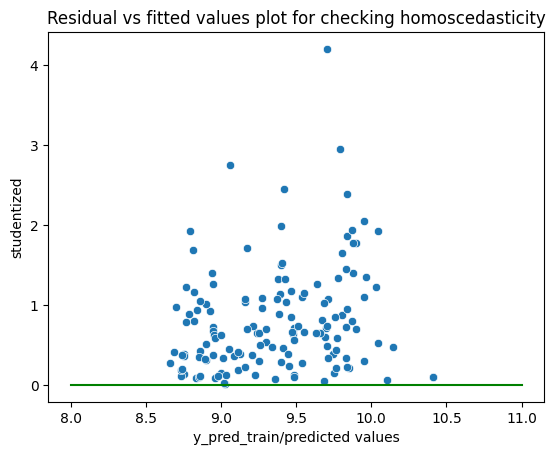

In [ ]:
#spreed level plot
p=sns.scatterplot(x=y_pred_train,y=abs(stud_res['student_resid']))
plt.xlabel('y_pred_train/predicted values')
plt.ylabel('studentized')
# plt.ylim(-0.6,0.6)
# plt.xlim(8,11)
p=sns.lineplot(x=[8,11],y=[0,0],color='green')
p=plt.title('Residual vs fitted values plot for checking homoscedasticity')